# **Koronavirus (Covid-19) Salgını - Türkiye'nin Durumu**

**Her güne ait tüm sayısal veriler T. C. Sağlık Bakanlığı ve Sağlık Bakanı Fahrettin Koca'nın günlük olarak yayımladığı "Türkiye Günlük Koronavirüs Tablosu"ndan alınmıştır.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
covid19TR = pd.read_csv('covid_19_turkiye_2020_04_27.csv', parse_dates=True)

In [2]:
#covid19TR['Tarih'] = pd.to_datetime(covid19TR['Tarih'])
covid19TR = covid19TR.set_index('Tarih')

### **Son 10 Güne Dair Sayısal Bilgiler**

In [3]:
covid19TR.tail(10)

,Toplam Vaka,Toplam Vefat,Toplam İyileşen,Toplam Test,Toplam Yoğun Bakım,Toplam Entübe
Tarih,,,,,,
2020-04-18,82329,1890,10453,598933.0,1894.0,1054.0
2020-04-19,86306,2017,11976,634277.0,1922.0,1031.0
2020-04-20,90980,2140,13430,673980.0,1909.0,1033.0
2020-04-21,95591,2259,14918,713409.0,1865.0,1006.0
2020-04-22,98674,2376,16477,750944.0,1814.0,985.0
2020-04-23,101790,2491,18491,791906.0,1816.0,982.0
2020-04-24,104912,2600,21737,830257.0,1790.0,929.0
2020-04-25,107773,2706,25582,868565.0,1782.0,900.0
2020-04-26,110130,2805,29140,889742.0,1776.0,883.0


### **Son 2 Haftaya Dair Vaka Sayısı Grafiği**

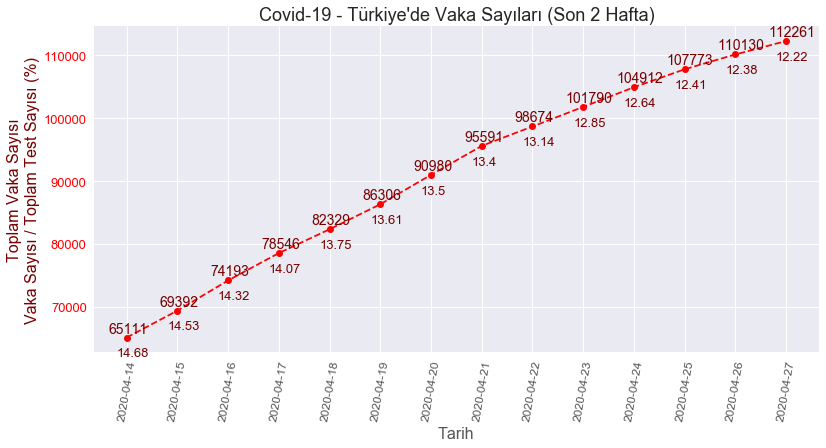

In [4]:
plt.style.use('seaborn')
plt.figure(figsize=(13,6))
plt.plot(covid19TR.index[-14:], covid19TR['Toplam Vaka'][-14:], marker='o', linestyle='--', color='r')
plt.xticks(covid19TR.index[-14:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='r', fontsize=13)
for i in range(len(covid19TR)-14,len(covid19TR)):
    plt.text(i-(len(covid19TR)-13.65), covid19TR.iloc[i,0]+800, covid19TR.iloc[i,0], fontsize=14, color='#770000')
    plt.text(i-(len(covid19TR)-13.8), covid19TR.iloc[i,0]-3000, round(covid19TR.iloc[i,0]/covid19TR.iloc[i,3]*100, 2),
             fontsize=13, color='#770000')
plt.title('Covid-19 - Türkiye\'de Vaka Sayıları (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Toplam Vaka Sayısı\nVaka Sayısı / Toplam Test Sayısı (%)', fontsize=16, color='#770000')
plt.show()

### **Son 2 Haftaya Dair Vefat Sayısı Grafiği**

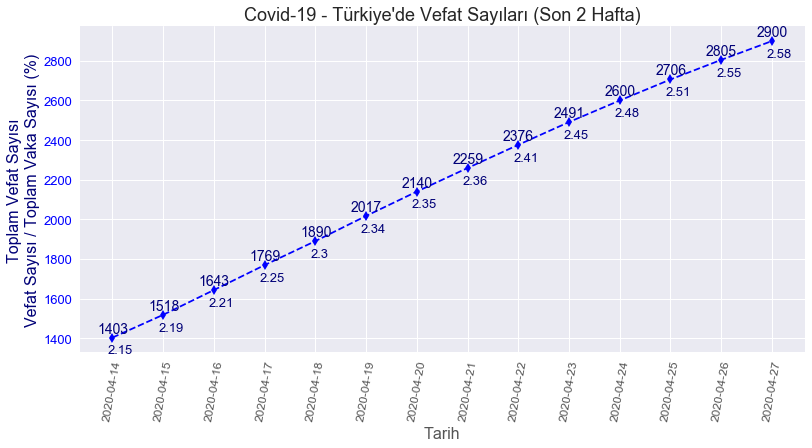

In [5]:
plt.figure(figsize=(13,6))
plt.plot(covid19TR.index[-14:], covid19TR['Toplam Vefat'][-14:], marker='d', linestyle='--', color='b')
plt.xticks(covid19TR.index[-14:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='b', fontsize=13)
for i in range(len(covid19TR)-14,len(covid19TR)):
    plt.text(i-(len(covid19TR)-13.7), covid19TR.iloc[i,1]+25, covid19TR.iloc[i,1], fontsize=14, color='#000077')
    plt.text(i-(len(covid19TR)-13.9), covid19TR.iloc[i,1]-80, round(covid19TR.iloc[i,1]/covid19TR.iloc[i,0]*100, 2), 
             fontsize=13, color='#000077')
plt.title('Covid-19 - Türkiye\'de Vefat Sayıları (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Toplam Vefat Sayısı\nVefat Sayısı / Toplam Vaka Sayısı (%)', fontsize=16, color='#000077')
plt.show()

### **Son 2 Haftaya Dair İyileşen Hasta Sayısı Grafiği**

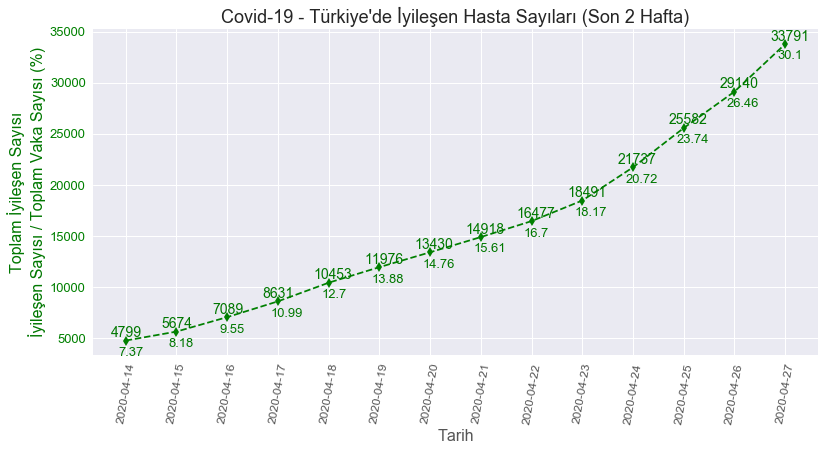

In [6]:
plt.figure(figsize=(13,6))
plt.plot(covid19TR.index[-14:], covid19TR['Toplam İyileşen'][-14:], marker='d', linestyle='--', color='g')
plt.xticks(covid19TR.index[-14:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='g', fontsize=13)
for i in range(len(covid19TR)-14,len(covid19TR)):
    plt.text(i-(len(covid19TR)-13.7), covid19TR.iloc[i,2]+350, covid19TR.iloc[i,2], fontsize=14, color='#007700')
    plt.text(i-(len(covid19TR)-13.85), covid19TR.iloc[i,2]-1500, round(covid19TR.iloc[i,2]/covid19TR.iloc[i,0]*100, 2), 
             fontsize=13, color='#007700')
plt.title('Covid-19 - Türkiye\'de İyileşen Hasta Sayıları (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Toplam İyileşen Sayısı\nİyileşen Sayısı / Toplam Vaka Sayısı (%)', fontsize=16, color='#007700')
plt.show()

In [7]:
covid19TR['Vaka Artış'] = covid19TR['Toplam Vaka'].diff()
covid19TR['Vefat Artış'] = covid19TR['Toplam Vefat'].diff()
covid19TR['İyileşen Artış'] = covid19TR['Toplam İyileşen'].diff()
covid19TR['Test Artış'] = covid19TR['Toplam Test'].diff()

### **Vaka, Vefat & İyileşen Artışlarına Dair İstatistikler**

In [8]:
round(covid19TR[['Vaka Artış', 'Vefat Artış', 'İyileşen Artış']].describe(), 2)

,Vaka Artış,Vefat Artış,İyileşen Artış
count,47.00,47.00,47.00
mean,2388.51,61.70,718.96
std,1720.69,47.42,1132.37
min,0.00,0.00,0.00
25%,341.00,10.50,0.00
50%,2704.00,75.00,256.00
75%,4016.50,102.50,1145.00
max,5138.00,127.00,4651.00


### **Son 2 hafta İçindeki Vaka Sayısı Artışları**

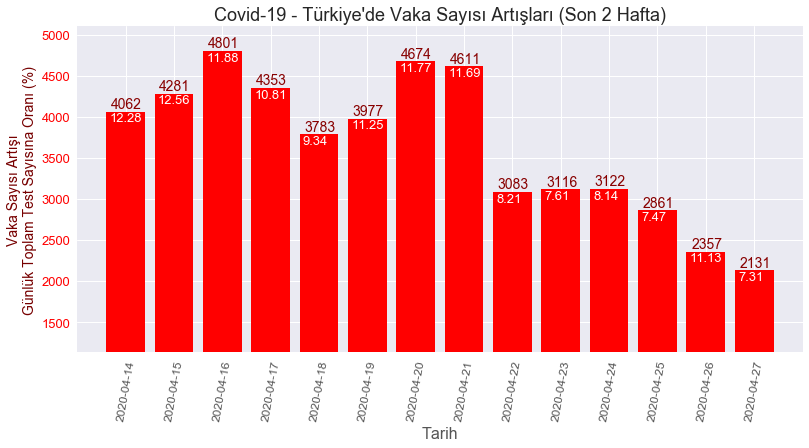

In [9]:
plt.figure(figsize=(13,6))
plt.bar(covid19TR.index[-14:], covid19TR['Vaka Artış'][-14:], color='r')
plt.axis([-1,14,covid19TR['Vaka Artış'][-14:].min()-1000,covid19TR['Vaka Artış'][-14:].max()+300])
plt.xticks(covid19TR.index[-14:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='r', fontsize=13)
for i in range(len(covid19TR)-14,len(covid19TR)):
    plt.text(i-(len(covid19TR)-13.70), covid19TR.iloc[i,6]+45, int(covid19TR.iloc[i,6]), fontsize=14, color='#880000')
    plt.text(i-(len(covid19TR)-13.67), covid19TR.iloc[i,6]-120, round(covid19TR.iloc[i,6] / covid19TR.iloc[i,9] * 100, 2),
             fontsize=13, color='white')
plt.title('Covid-19 - Türkiye\'de Vaka Sayısı Artışları (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vaka Sayısı Artışı\nGünlük Toplam Test Sayısına Oranı (%)', fontsize=14, color='#770000')
plt.show()

### **Son 2 hafta İçindeki Vefat Sayısı Artışları**

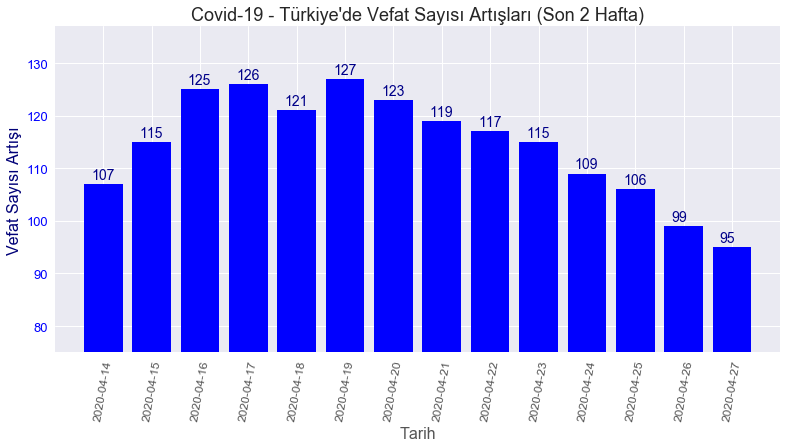

In [10]:
plt.figure(figsize=(13,6))
plt.bar(covid19TR.index[-14:], covid19TR['Vefat Artış'][-14:], color='b')
plt.axis([-1,14,covid19TR['Vefat Artış'][-14:].min()-20,covid19TR['Vefat Artış'][-14:].max()+10])
plt.xticks(covid19TR.index[-14:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='b', fontsize=13)
for i in range(len(covid19TR)-14,len(covid19TR)):
    plt.text(i-(len(covid19TR)-13.75), covid19TR.iloc[i,7]+1, int(covid19TR.iloc[i,7]), fontsize=14, color='#000088')
plt.title('Covid-19 - Türkiye\'de Vefat Sayısı Artışları (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vefat Sayısı Artışı', fontsize=16, color='#000077')
plt.show()

### **Son 2 Hafta İçindeki İyileşen Hasta Sayısı Artışları**

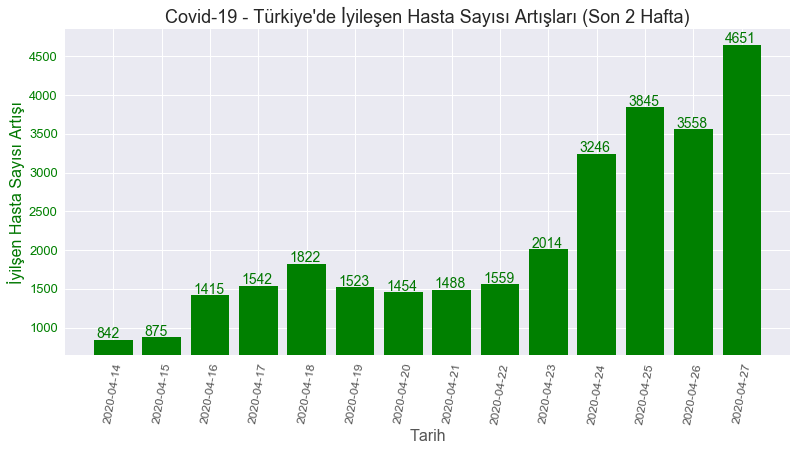

In [11]:
plt.figure(figsize=(13,6))
plt.bar(covid19TR.index[-14:], covid19TR['İyileşen Artış'][-14:], color='g')
plt.axis([-1,14,covid19TR['İyileşen Artış'][-14:].min()-200,covid19TR['İyileşen Artış'][-14:].max()+200])
plt.xticks(covid19TR.index[-14:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='g', fontsize=13)
for i in range(len(covid19TR)-14,len(covid19TR)):
    plt.text(i-(len(covid19TR)-13.65), covid19TR.iloc[i,8]+20, int(covid19TR.iloc[i,8]), fontsize=14, color='#007700')
plt.title('Covid-19 - Türkiye\'de İyileşen Hasta Sayısı Artışları (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('İyilşen Hasta Sayısı Artışı', fontsize=16, color='#007700')
plt.show()

### **Tüm Günler Vaka/Vefat/İyileşen Sayılarının Birbirleriyle İlişkileri ve Katsayısı**

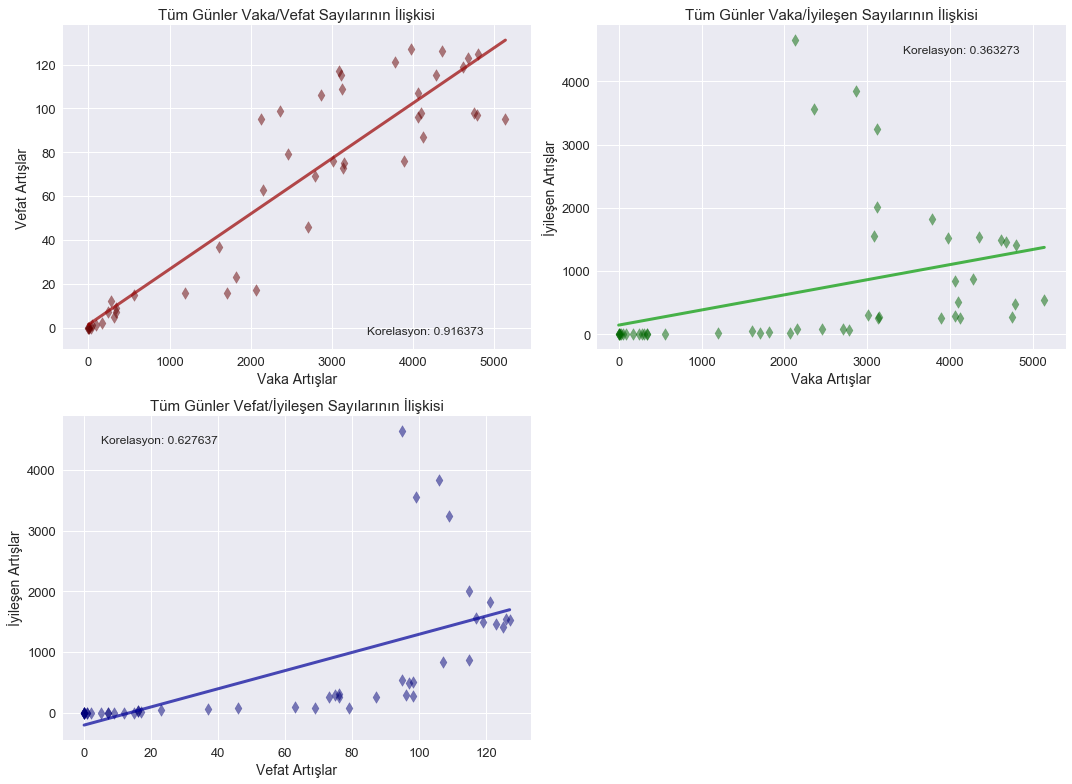

In [12]:
slp1, intcp1 = np.polyfit(covid19TR['Vaka Artış'][1:], covid19TR['Vefat Artış'][1:],1)
x1 = [0, covid19TR['Vaka Artış'].max()]
y1 = [intcp1+x1[0], intcp1+(slp1*x1[1])]
plt.figure(figsize=(15,11))
plt.subplot(2, 2, 1)
plt.plot(x1, y1, alpha=0.7, linewidth=3, color='#990000')
plt.scatter(covid19TR['Vaka Artış'], covid19TR['Vefat Artış'], marker='d', s=70, color='#660000', alpha=0.5)
plt.text(covid19TR['Vaka Artış'].max()-1700, -3,
         "Korelasyon: " + str(round(np.corrcoef(covid19TR['Vaka Artış'][1:], covid19TR['Vefat Artış'][1:])[0,1], 6)),
         fontsize=12)
plt.title('Tüm Günler Vaka/Vefat Sayılarının İlişkisi', fontsize=15)
plt.xlabel('Vaka Artışlar', fontsize=14)
plt.ylabel('Vefat Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
slp2, intcp2 = np.polyfit(covid19TR['Vaka Artış'][1:], covid19TR['İyileşen Artış'][1:], 1)
x2 = [0, covid19TR['Vaka Artış'].max()]
y2 = [intcp2+x2[0], intcp2+(slp2*x2[1])]
plt.subplot(2, 2, 2)
plt.scatter(covid19TR['Vaka Artış'], covid19TR['İyileşen Artış'], marker='d', s=70, color='#006600', alpha=0.5)
plt.plot(x2, y2, alpha=0.7, linewidth=3, color='#009900')
plt.text(covid19TR['Vaka Artış'].max()-1700, covid19TR['İyileşen Artış'].max()-200,
        "Korelasyon: " + str(round(np.corrcoef(covid19TR['Vaka Artış'][1:], covid19TR['İyileşen Artış'][1:])[0,1], 6)),
        fontsize=12)
plt.title('Tüm Günler Vaka/İyileşen Sayılarının İlişkisi', fontsize=15)
plt.xlabel('Vaka Artışlar', fontsize=14)
plt.ylabel('İyileşen Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
slp3, intcp3 = np.polyfit(covid19TR['Vefat Artış'][1:], covid19TR['İyileşen Artış'][1:], 1)
x3 = [0, covid19TR['Vefat Artış'].max()]
y3 = [intcp3+x3[0], intcp3+(slp3*x3[1])]
plt.subplot(2, 2, 3)
plt.scatter(covid19TR['Vefat Artış'], covid19TR['İyileşen Artış'], marker='d', s=70, color='#000077', alpha=0.5)
plt.plot(x3, y3, alpha=0.7, linewidth=3, color='#000099')
plt.text(covid19TR['Vefat Artış'].min()+5, covid19TR['İyileşen Artış'].max()-200,
         "Korelasyon: " + str(round(np.corrcoef(covid19TR['Vefat Artış'][1:], covid19TR['İyileşen Artış'][1:])[0,1], 6)),
         fontsize=12)
plt.title('Tüm Günler Vefat/İyileşen Sayılarının İlişkisi', fontsize=15)
plt.xlabel('Vefat Artışlar', fontsize=14)
plt.ylabel('İyileşen Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()

In [13]:
covid19TR['Vaka +/-'] = covid19TR['Vaka Artış'].diff()
covid19TR['Vefat +/-'] = covid19TR['Vefat Artış'].diff()
covid19TR['İyileşen +/-'] = covid19TR['İyileşen Artış'].diff()

### **Her Gün Vaka, Vefat & İyileşen Sayısı Değişimine Dair İstatistikler**

In [14]:
round(covid19TR[['Vaka +/-', 'Vefat +/-', 'İyileşen +/-']].describe(),2)

,Vaka +/-,Vefat +/-,İyileşen +/-
count,46.00,46.00,46.00
mean,46.33,2.07,101.11
std,448.63,6.06,283.70
min,-1528.00,-10.00,-299.00
25%,-87.75,-2.00,0.00
50%,27.50,1.00,3.50
75%,223.50,7.00,33.75
max,1094.00,17.00,1232.00


### **Son 2 Haftadaki Vaka Sayısı Değişim Grafiği**

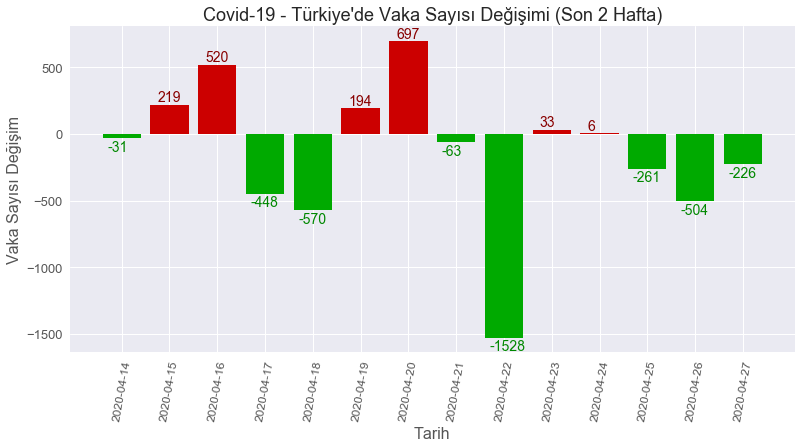

In [15]:
plt.figure(figsize=(13,6))
barc = []
for i in range(len(covid19TR)-14,len(covid19TR)):
    if covid19TR.iloc[i,10] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-14:], covid19TR['Vaka +/-'][-14:], color=barc)
plt.xticks(covid19TR.index[-14:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
for i in range(len(covid19TR)-14,len(covid19TR)):
    if covid19TR.iloc[i,10] >= 0:
        plt.text(i-(len(covid19TR)-13.75), covid19TR.iloc[i,10]+25, int(covid19TR.iloc[i,10]), fontsize=14, color='#880000')
    else:
        plt.text(i-(len(covid19TR)-13.70), covid19TR.iloc[i,10]-95, int(covid19TR.iloc[i,10]), fontsize=14, color='#008800')
plt.title('Covid-19 - Türkiye\'de Vaka Sayısı Değişimi (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vaka Sayısı Değişim', fontsize=16, color='#555555')
plt.show()

### **Son 2 Haftadaki Vefat Sayısı Değişim Grafiği**

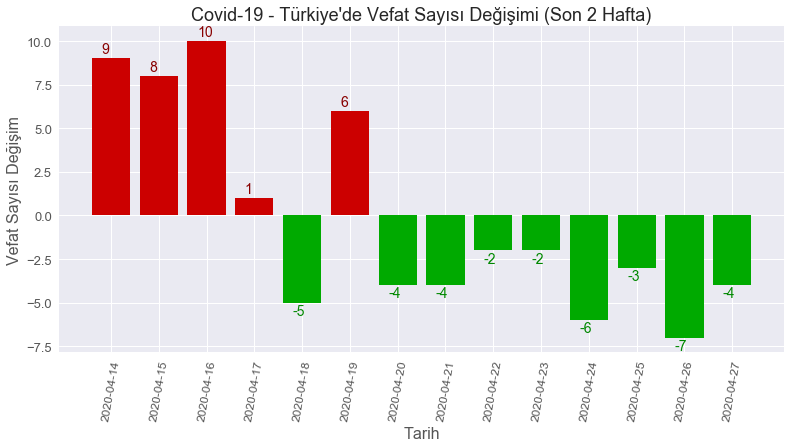

In [16]:
plt.figure(figsize=(13,6))
barc = []
for i in range(len(covid19TR)-14,len(covid19TR)):
    if covid19TR.iloc[i,11] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-14:], covid19TR['Vefat +/-'][-14:], color=barc)
plt.xticks(covid19TR.index[-14:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
for i in range(len(covid19TR)-14,len(covid19TR)):
    if covid19TR.iloc[i,11] >= 0:
        plt.text(i-(len(covid19TR)-13.80), covid19TR.iloc[i,11]+0.3, int(covid19TR.iloc[i,11]), fontsize=14, color='#880000')
    else:
        plt.text(i-(len(covid19TR)-13.80), covid19TR.iloc[i,11]-0.7, int(covid19TR.iloc[i,11]), fontsize=14, color='#008800')
plt.title('Covid-19 - Türkiye\'de Vefat Sayısı Değişimi (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vefat Sayısı Değişim', fontsize=16, color='#555555')
plt.show()

### **Son 2 Haftadaki İyileşen Hasta Sayısı Değişim Grafiği**

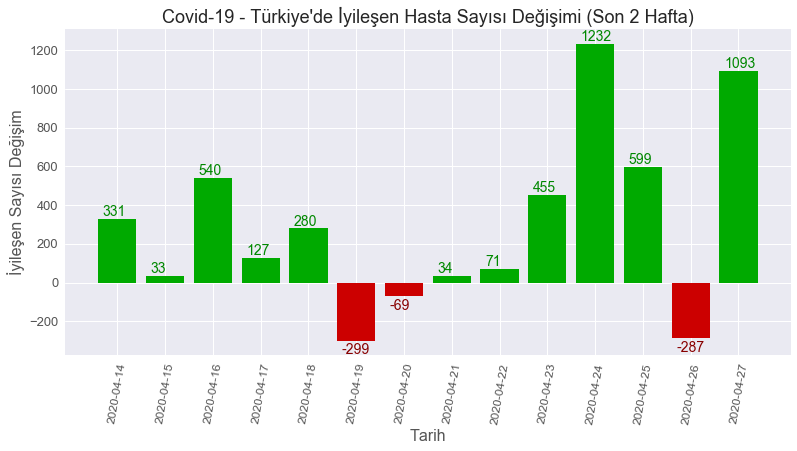

In [17]:
plt.figure(figsize=(13,6))
barc = []
for i in range(len(covid19TR)-14,len(covid19TR)):
    if covid19TR.iloc[i,12] >= 0:
        barc.append('#00aa00')
    else:   barc.append('#cc0000')
plt.bar(covid19TR.index[-14:], covid19TR['İyileşen +/-'][-14:], color=barc)
plt.xticks(covid19TR.index[-14:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
for i in range(len(covid19TR)-14,len(covid19TR)):
    if covid19TR.iloc[i,12] >= 0:
        plt.text(i-(len(covid19TR)-13.70), covid19TR.iloc[i,12]+15, int(covid19TR.iloc[i,12]), fontsize=14, color='#008800')
    else:
        plt.text(i-(len(covid19TR)-13.70), covid19TR.iloc[i,12]-70, int(covid19TR.iloc[i,12]), fontsize=14, color='#880000')
plt.title('Covid-19 - Türkiye\'de İyileşen Hasta Sayısı Değişimi (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('İyileşen Sayısı Değişim', fontsize=16, color='#555555')
plt.show()

### **Son 2 Haftadaki Toplam Aktif Vaka Sayıları**

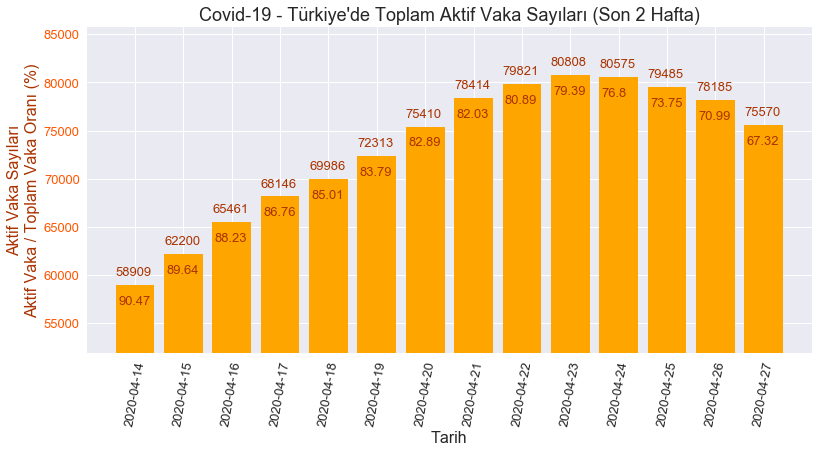

In [18]:
covid19TR['Toplam Aktif Vaka'] = covid19TR['Toplam Vaka'] - covid19TR['Toplam Vefat'] - covid19TR['Toplam İyileşen']
plt.figure(figsize=(13,6))
plt.bar(covid19TR.index[-14:], covid19TR['Toplam Aktif Vaka'][-14:], color='orange')
plt.axis([-1,14,covid19TR['Toplam Aktif Vaka'][-14:].min()-7000,covid19TR['Toplam Aktif Vaka'][-14:].max()+5000])
for i in range(len(covid19TR)-14,len(covid19TR)):
    plt.text(i-(len(covid19TR)-13.6), covid19TR.iloc[i,13]+1000, int(covid19TR.iloc[i,13]),
             fontsize=13, color='#aa3300')
    plt.text(i-(len(covid19TR)-13.65), covid19TR.iloc[i,13]-2000, round(covid19TR.iloc[i,13]/covid19TR.iloc[i,0]*100, 2),
             fontsize=13, color='#aa3300')
plt.xticks(rotation=80, fontsize=13)
plt.yticks(fontsize=13, color='#ff5500')
plt.title('Covid-19 - Türkiye\'de Toplam Aktif Vaka Sayıları (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16)
plt.ylabel('Aktif Vaka Sayıları\nAktif Vaka / Toplam Vaka Oranı (%)', fontsize=16, color='#aa3300')
plt.show()

### **Toplam Yoğun Bakım ve Entübe Hasta Sayılarına Dair İstatistikler**

In [19]:
round(covid19TR[['Toplam Yoğun Bakım', 'Toplam Entübe']].describe(), 2)

,Toplam Yoğun Bakım,Toplam Entübe
count,32.00,32.00
mean,1476.91,882.56
std,461.55,226.66
min,344.00,241.00
25%,1296.00,878.25
50%,1666.00,980.00
75%,1814.50,1023.50
max,1922.00,1087.00


### **Son 2 Haftadaki Toplam Yoğun Bakım & Entübe Hasta Sayıları**

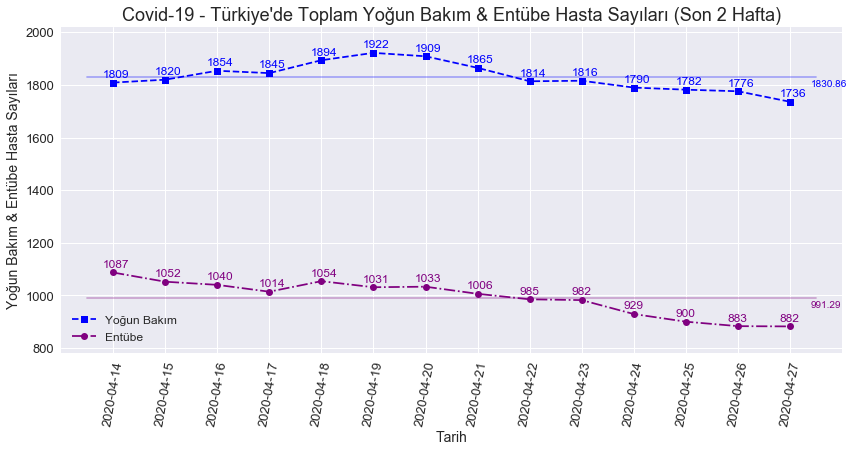

In [20]:
plt.figure(figsize=(14,6))
plt.plot(covid19TR.index[-14:], covid19TR['Toplam Yoğun Bakım'][-14:], linestyle='--', marker='s', label='Yoğun Bakım',
         color='blue')
plt.plot(covid19TR.index[-14:], covid19TR['Toplam Entübe'][-14:], linestyle='-.', marker='o', label='Entübe',
         color='purple')
yb_ort = covid19TR['Toplam Yoğun Bakım'][-14:].mean()
ent_ort = covid19TR['Toplam Entübe'][-14:].mean()
x = [-0.5, 13.5]
y1 = [yb_ort, yb_ort]
plt.plot(x, y1, alpha=0.3, color='blue')
y2 = [ent_ort, ent_ort]
plt.plot(x, y2, alpha=0.3, color='purple')
plt.axis([-1, 14, covid19TR['Toplam Entübe'][-14:].min()-100, covid19TR['Toplam Yoğun Bakım'][-14:].max()+100])
for i in range(len(covid19TR)-14,len(covid19TR)):
    plt.text(i-(len(covid19TR)-13.8), covid19TR.iloc[i,4]+20, int(covid19TR.iloc[i,4]), fontsize=12, color='blue')
    plt.text(i-(len(covid19TR)-13.8), covid19TR.iloc[i,5]+20, int(covid19TR.iloc[i,5]), fontsize=12, color='purple')
plt.text(13.4, yb_ort-35, round(yb_ort, 2), color='b')
plt.text(13.4, ent_ort-35, round(ent_ort, 2), color='purple')
plt.legend(loc='lower left', fontsize=12)
plt.xticks(rotation=80, fontsize=13)
plt.yticks(fontsize=13)
plt.title('Covid-19 - Türkiye\'de Toplam Yoğun Bakım & Entübe Hasta Sayıları (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=14)
plt.ylabel('Yoğun Bakım & Entübe Hasta Sayıları', fontsize=14)
plt.show()